In [1]:
cd ..

/Users/nate/chess/hans


In [12]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.style.use("seaborn")

In [16]:
pgns = Path("pgns")
players = [pgn.stem for pgn in pgns.glob("*.pgn")]
players

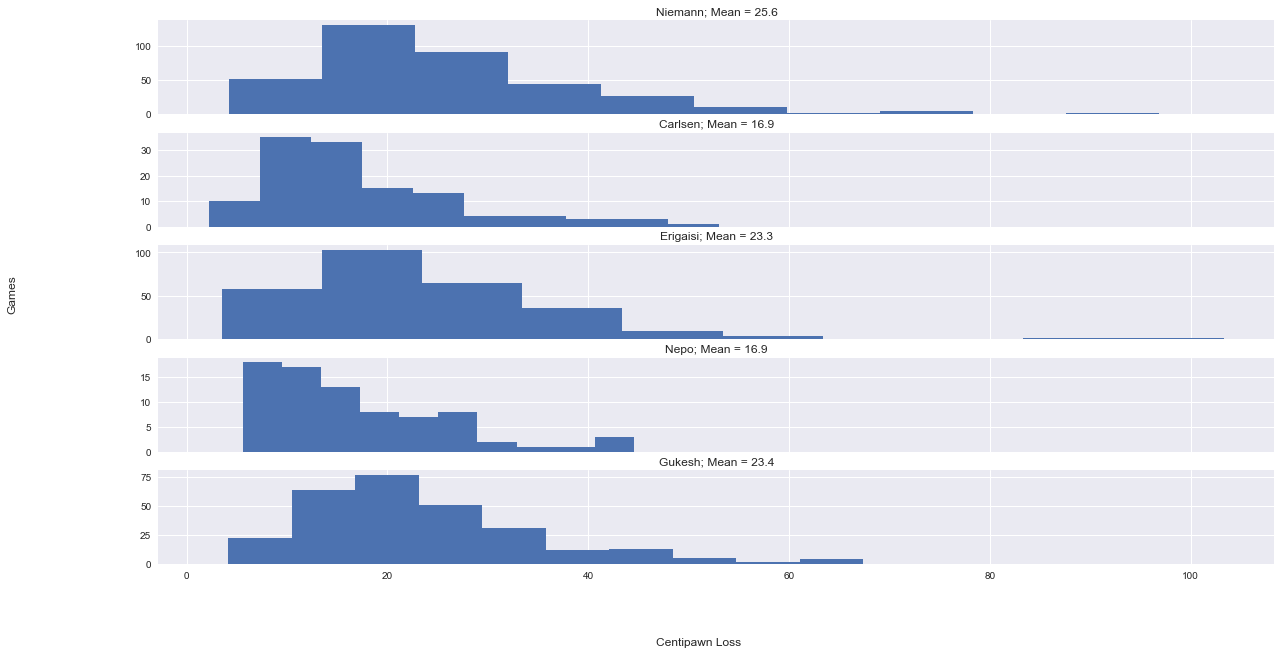

In [45]:
fig, axs = plt.subplots(5, figsize=(20,10), sharex=True)
for ax, player in zip(axs, players):
    loss = pd.read_csv(f"output/cp_loss/{player}.csv", index_col=0)
    game_losses = loss.mean(axis=1)
    game_losses.hist(ax=ax, bins=10)
    title = f"{player.capitalize()}; Mean = {game_losses.mean().round(1)}"
    ax.set_title(title)
fig.supxlabel("Centipawn Loss")
fig.supylabel("Games")
plt.savefig("cp_loss.png")